# BrainStation Capstone: Flight Data and CO2 Emissions

**Author:** Xenel Nazar

**Contact Info:** xenel.nazar@gmail.com

**Submission Date:** Sept 26, 2022

**Notebook:** 4 of 4

Table of Contents:

[Introduction](#Introduction) \
[Modeling](#Modeling) \
[X and Y Split](#X-and-Y-Split) \
[Train-Validation-Test Split](#Train-Validation-Test-Split) \
[Scaling](#Scaling)\
[Dimesion Reduction](#Dimension-Reduction) \
[Logistic Regression](#Logistic-Regression) \
[SVM](#SVM) \
[Decision Trees](#Decision-Trees) \
[Random Forest](#Random-Forest) \
[XGBoost](#XGBoost)\
[Model Tuning](#Model-Tuning)\
[Decision Trees Tuned](#Decision-Trees-Tuned) \
[Random Forest Tuned](#Random-Forest-Tuned) \
[XGBoost Tuned](#XGBoost-Tuned) \
[Model Selection & Evaluation](#Model-Selection-&-Evaluation) \
[Next Steps](#Next-Steps)




# Introduction

The following notebook details the steps undertaken to prepare our processed data for modeling. Later in the notebook, we will look at various models and adjust their hyperparameters to optimize their results. We will then evaluate our strongest model to generate predictions.

#### Import Libraries

We will first import all necessary libaries to help with modeling our data.

In [118]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split
# For Scaling Data
from sklearn.preprocessing import StandardScaler
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# PCA
from sklearn.decomposition import PCA
# XGBoost
from xgboost import XGBClassifier
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# SVC
from sklearn.svm import LinearSVC
# To cross-validate
from sklearn.model_selection import cross_val_score
# To build a pipeline
from sklearn.pipeline import Pipeline
# To do a cross-validated grid search
from sklearn.model_selection import GridSearchCV
# To set up a temporary directory for caching pipeline results
from tempfile import mkdtemp
# confusion matrix and classification report
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

#### Import Data

We will now import the csv file that was generated after pre-processing.

In [2]:
# Read in the data 
df = pd.read_csv('data/flight_data_processed.csv')

In [3]:
# verify
df.head()

,from_Airport_Lat,from_Airport_Lon,dest_Airport_Lat,dest_Airport_Lon,duration,stops,price,co2_emissions,Distance_km,KM/LBS,...,airline_1_Volaris,airline_1_Vueling,airline_1_WestJet,airline_1_Wideroe,airline_1_Wingo,airline_1_Wizz Air,airline_1_XiamenAir,airline_1_easyJet,airline_1_flydubai,airline_1_jetSMART
0,36.698236,3.208053,-34.557739,-58.416644,1425,3,1279.0,1320.0,10167.91,7.702962,...,0,0,0,0,0,0,0,0,0,0
1,36.698236,3.208053,-34.557739,-58.416644,1425,3,1279.0,1195.0,10167.91,8.508711,...,0,0,0,0,0,0,0,0,0,0
2,36.698236,3.208053,-34.557739,-58.416644,1530,3,1284.0,1248.0,10167.91,8.147364,...,0,0,0,0,0,0,0,0,0,0
3,36.698236,3.208053,-34.557739,-58.416644,1425,3,1290.0,1347.0,10167.91,7.548560,...,0,0,0,0,0,0,0,0,0,0
4,36.698236,3.208053,-34.557739,-58.416644,1540,2,1347.0,1381.0,10167.91,7.362715,...,0,0,0,0,0,0,0,0,0,0


# Modeling

We will review how our data looks.

In [4]:
print('Data Shape:', df.shape)
print('\nNumber of rows:', df.shape[0])
print('\nNumber of columns:', df.shape[1])

Data Shape: (850735, 388)

Number of rows: 850735

Number of columns: 388


The data has 850,735 rows and has 388 columns. We can review further what columns are listed.

In [5]:
list(df.columns)

['from_Airport_Lat',
 'from_Airport_Lon',
 'dest_Airport_Lat',
 'dest_Airport_Lon',
 'duration',
 'stops',
 'price',
 'co2_emissions',
 'Distance_km',
 'KM/LBS',
 'KM/LBS_Classification',
 'from_Airport_City_Addis Ababa',
 'from_Airport_City_Algiers',
 'from_Airport_City_Athens',
 'from_Airport_City_Beijing',
 'from_Airport_City_Bogota',
 'from_Airport_City_Brussels',
 'from_Airport_City_Buenos Aires',
 'from_Airport_City_Cairo',
 'from_Airport_City_Chengdu',
 'from_Airport_City_Confins',
 'from_Airport_City_Copenhagen',
 'from_Airport_City_Delhi',
 'from_Airport_City_Dublin',
 'from_Airport_City_Frankfurt',
 'from_Airport_City_Guangzhou',
 'from_Airport_City_Hangzhou',
 'from_Airport_City_Melbourne',
 'from_Airport_City_Mumbai',
 'from_Airport_City_Munich',
 'from_Airport_City_Paris',
 'from_Airport_City_Santiago',
 'from_Airport_City_Sao Paulo',
 'from_Airport_City_Shanghai',
 'from_Airport_City_Shenzhen',
 'from_Airport_City_Sydney',
 'from_Airport_City_Toronto',
 'from_Airport_City

We can drop some of the numerical columns that display similar information. We will drop the following columns:
- `co2_emissions`
- `Distance_km`
- `KM/LBS`

In [6]:
# Drop columns
df = df.drop(['co2_emissions','Distance_km','KM/LBS'], axis=1)

In [7]:
# verify
list(df.columns)

['from_Airport_Lat',
 'from_Airport_Lon',
 'dest_Airport_Lat',
 'dest_Airport_Lon',
 'duration',
 'stops',
 'price',
 'KM/LBS_Classification',
 'from_Airport_City_Addis Ababa',
 'from_Airport_City_Algiers',
 'from_Airport_City_Athens',
 'from_Airport_City_Beijing',
 'from_Airport_City_Bogota',
 'from_Airport_City_Brussels',
 'from_Airport_City_Buenos Aires',
 'from_Airport_City_Cairo',
 'from_Airport_City_Chengdu',
 'from_Airport_City_Confins',
 'from_Airport_City_Copenhagen',
 'from_Airport_City_Delhi',
 'from_Airport_City_Dublin',
 'from_Airport_City_Frankfurt',
 'from_Airport_City_Guangzhou',
 'from_Airport_City_Hangzhou',
 'from_Airport_City_Melbourne',
 'from_Airport_City_Mumbai',
 'from_Airport_City_Munich',
 'from_Airport_City_Paris',
 'from_Airport_City_Santiago',
 'from_Airport_City_Sao Paulo',
 'from_Airport_City_Shanghai',
 'from_Airport_City_Shenzhen',
 'from_Airport_City_Sydney',
 'from_Airport_City_Toronto',
 'from_Airport_City_Vienna',
 "from_Airport_City_Xi'an",
 'from_

We will now review our dataset's shape again.

In [8]:
print('Data Shape:', df.shape)
print('\nNumber of rows:', df.shape[0])
print('\nNumber of columns:', df.shape[1])

Data Shape: (850735, 385)

Number of rows: 850735

Number of columns: 385


The dataset now has 385 columns and 850,735 rows.

#### X and Y Split

We can now conduct a X and Y split on our data to prepare for modeling. Our target variable will be our efficiency or utilization metric, which is the `KM/LBS_Classification` column.

In [9]:
# x and y split
y_col = 'KM/LBS_Classification'
y_clean = df[y_col]
X_clean = df[df.columns.drop(y_col)]

In [10]:
# verify
X_clean

,from_Airport_Lat,from_Airport_Lon,dest_Airport_Lat,dest_Airport_Lon,duration,stops,price,from_Airport_City_Addis Ababa,from_Airport_City_Algiers,from_Airport_City_Athens,...,airline_1_Volaris,airline_1_Vueling,airline_1_WestJet,airline_1_Wideroe,airline_1_Wingo,airline_1_Wizz Air,airline_1_XiamenAir,airline_1_easyJet,airline_1_flydubai,airline_1_jetSMART
0,36.698236,3.208053,-34.557739,-58.416644,1425,3,1279.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,36.698236,3.208053,-34.557739,-58.416644,1425,3,1279.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,36.698236,3.208053,-34.557739,-58.416644,1530,3,1284.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,36.698236,3.208053,-34.557739,-58.416644,1425,3,1290.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,36.698236,3.208053,-34.557739,-58.416644,1540,2,1347.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850730,19.093816,72.872382,-33.949812,151.182320,1335,1,1317.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
850731,19.093816,72.872382,-33.949812,151.182320,1155,1,1317.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
850732,19.093816,72.872382,-33.949812,151.182320,1490,2,1328.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
850733,19.093816,72.872382,-33.949812,151.182320,1695,2,1368.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# verify
y_clean

0         1
1         1
2         1
3         1
4         1
         ..
850730    1
850731    1
850732    1
850733    1
850734    1
Name: KM/LBS_Classification, Length: 850735, dtype: int64

#### Train-Validation-Test Split

We will now split the data into train, validation, and test data. 

To gauge our splits, we will first look at the proportion of our Target variable. 

In [12]:
# Check target variable proportions
y_clean.value_counts()/len(y_clean)*100

1    86.089793
0    13.910207
Name: KM/LBS_Classification, dtype: float64

We can see that we have an imbalanced dataset, we may look to have a higher test size split for modeling. Other options we can try later include over or undersampling of the data. We can try using SMOTE later to assist with Oversampling. 

For simplicity we can do a 70/30 remainder-test split.

In [13]:
# Split into train and test
X_remainder, X_test, y_remainder, y_test = train_test_split(X_clean, y_clean, 
                                                                      test_size = 0.30, 
                                                                      stratify=y_clean,
                                                                      random_state=1)

In [14]:
# Verify # of rows in train and test data
print('Remainder # of Rows:', X_remainder.shape[0])
print('\nTest Data # of rows:', X_test.shape[0])

Remainder # of Rows: 595514

Test Data # of rows: 255221


The remainder data has 595,514 rows and the test data has 255,221 rows.

In [15]:
# Check test rating proportions
print('---REMAINDER---')
y_remainder.value_counts()/len(y_remainder)

---REMAINDER---


1    0.860898
0    0.139102
Name: KM/LBS_Classification, dtype: float64

In [16]:
# Check test rating proportions
print('---TEST---')
y_test.value_counts()/len(y_test)

---TEST---


1    0.860897
0    0.139103
Name: KM/LBS_Classification, dtype: float64

We can now split the remainder data into train and validation datasets. We will do a 60/40 split, to have the validation set almost equal to the test set in size.

In [17]:
# Split into train and validation
X_train, X_validation, y_train, y_validation = train_test_split(X_remainder, 
                                                                      y_remainder, 
                                                                      test_size = 0.40, 
                                                                      stratify=y_remainder,
                                                                      random_state=1)

In [18]:
# Verify # of rows in train, validation, and test data
i = X_train.shape[0]
j = X_validation.shape[0]
k = X_test.shape[0]
n = i+j+k

print('Train Data # of Rows:', i)
print('Train Data equates to', round((i/n)*100),'% of our data')
print('Validation Data # of Rows:', j)
print('Validation Data equates to', round((j/n)*100),'% of our data')
print('Test Data # of rows:', k)
print('Test Data equates to', round((k/n)*100),'% of our data')

Train Data # of Rows: 357308
Train Data equates to 42 % of our data
Validation Data # of Rows: 238206
Validation Data equates to 28 % of our data
Test Data # of rows: 255221
Test Data equates to 30 % of our data


After our train, validation, and test split. We have the following:
- Train Data has 357,308 rows which equates to **42%** of our data
- Validation Data has 238,206 rows which equates to **28%** of our data
- Test Data has 255,221 rows which equates to **30%** of our data

In [19]:
# Check TRAIN rating proportions
print('---TRAIN---')
y_train.value_counts()/len(y_train)

---TRAIN---


1    0.860899
0    0.139101
Name: KM/LBS_Classification, dtype: float64

In [20]:
# Check VALIDATION rating proportions
print('---VALIDATION---')
y_validation.value_counts()/len(y_validation)

---VALIDATION---


1    0.860898
0    0.139102
Name: KM/LBS_Classification, dtype: float64

In [21]:
# Check TEST rating proportions
print('---TEST---')
y_test.value_counts()/len(y_test)

---TEST---


1    0.860897
0    0.139103
Name: KM/LBS_Classification, dtype: float64

We can now look to scaling our data, as the values in our data have a widespread, as shown below where we review how our values are spread.

In [22]:
# overview of our data's values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
from_Airport_Lat,850735.0,23.933925,32.100336,-34.557739,4.734304,37.935742,49.008840,55.617758
from_Airport_Lon,850735.0,19.258635,66.657675,-79.624369,-6.248561,11.776875,38.783292,151.699213
dest_Airport_Lat,850735.0,27.961962,25.536341,-34.557739,19.093816,35.549480,47.461463,60.198000
dest_Airport_Lon,850735.0,-2.292254,75.065561,-122.398509,-79.390167,4.487104,31.402942,151.699213
duration,850735.0,1413.237392,665.745796,55.000000,946.000000,1360.000000,1810.000000,6095.000000
...,...,...,...,...,...,...,...,...
airline_1_Wizz Air,850735.0,0.000036,0.006036,0.000000,0.000000,0.000000,0.000000,1.000000
airline_1_XiamenAir,850735.0,0.002729,0.052172,0.000000,0.000000,0.000000,0.000000,1.000000
airline_1_easyJet,850735.0,0.000299,0.017276,0.000000,0.000000,0.000000,0.000000,1.000000
airline_1_flydubai,850735.0,0.000279,0.016688,0.000000,0.000000,0.000000,0.000000,1.000000


#### Scaling

For the purpose of this capstone project, we will use a Standard Scaler, as it is typically the default we use when scaling data, and should help with our various spread of numerical values.

In [23]:
# Instantiate
scaler = StandardScaler()

# Fit
scaler.fit(X_train)

# Transform on train and test
X_scaled_train = scaler.transform(X_train)
X_scaled_validation = scaler.transform(X_validation)
X_scaled_test = scaler.transform(X_test) 

#### Dimension Reduction

We can also look at possible dimension reduction in our data, as we have a number of independent variables listed in our dataset. This will likely lead to difficulties in interpreting our data as we aren't fittting it to the original features, but to the principal components.

We will assume a threshold of 90% for the explained variance.

In [24]:
# Instantiate
my_PCA = PCA(n_components = 0.9)

# Fit
my_PCA.fit(X_scaled_train)

# Transform data 
X_train_PCA = my_PCA.transform(X_scaled_train)
X_validation_PCA = my_PCA.transform(X_scaled_validation)
X_test_PCA = my_PCA.transform(X_scaled_test)

In [25]:
print(f'For 90% variance theshold, we need {X_train_PCA.shape[1]} components')

For 90% variance theshold, we need 242 components


To meet our 90% threshold, we need 242 components.

#### Logistic Regression

We will first look at running a Logistic Regression model on the scaled data. 

In [26]:
my_logreg = LogisticRegression(solver='lbfgs', random_state=1, max_iter=1000)

# Fitting to PCA data
my_logreg.fit(X_scaled_train,y_train)

# Scoring on PCA train and test sets
print(f'Train Score: {my_logreg.score(X_scaled_train , y_train)}')
print(f'Validation Score: {my_logreg.score(X_scaled_validation, y_validation)}')

Train Score: 0.8847884738097104
Validation Score: 0.884117108721023


|        Model       	| Accuracy 	|
|:------------------:	|:--------:	|
| Logistic Model     	| 0.88     	|

As we can see the baseline logistic model has an accuracty of 88%. The train and validation score are closely aligned, which can point to overfitting in the model.

We can also look at running the Logistic Regression model on our PCA reduced data, to see if our accuracy improves.

In [27]:
my_logreg_PCA = LogisticRegression(solver='lbfgs', random_state=1, max_iter=1000)

# Fitting to PCA data
my_logreg_PCA.fit(X_train_PCA,y_train)

# Scoring on PCA train and test sets
print(f'Train Score: {my_logreg_PCA.score(X_train_PCA, y_train)}')
print(f'Validation Score: {my_logreg_PCA.score(X_validation_PCA, y_validation)}')

Train Score: 0.8759277709986902
Validation Score: 0.8750703172883975


|        Model       	| Accuracy 	|
|:------------------:	|:--------:	|
| Logistic Model     	| 0.88     	|
| Logistic-PCA Model.   | 0.88 |

We can see that running the PCA did not impact our accuracy, and it is similar at ~88%. 

#### SVM

We will now look at the LinearSVC model for this data.

In [41]:
# SVM
# Instantiate
SVM_model = LinearSVC(random_state=1, max_iter=1000)

# Fit
SVM_model.fit(X_scaled_train, y_train)

# Evaluate
print(f"The Train classification accuracy is: {SVM_model.score(X_scaled_train, y_train)}")
print(f"The Validation classification accuracy is: {SVM_model.score(X_scaled_validation, y_validation)}")

/Users/xen/opt/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



The Train classification accuracy is: 0.8731654482967076
The Validation classification accuracy is: 0.8726648363181448


|        Model       	| Accuracy 	|
|:------------------:	|:--------:	|
| Logistic Model     	| 0.88     	|
| Logistic-PCA Model.   | 0.88 |
| SVM Model     	| 0.87     	|

We can see that the the SVM model performed in-line with Logistic Model at 87%. 

We can look at tree-based models, such as Decision Trees, Random Forest, and ensemble learning tree methods, like XGBoost.

### Decision Trees

We will first look at Decision Tree models to help with our data.

In [42]:
# Decision Trees
# Instantiate
dt = DecisionTreeClassifier(max_depth=1)

# Fit
dt.fit(X_train, y_train)

# Score
print('Train Dataset Score:',dt.score(X_train, y_train))
print('Validation Dataset Score:',dt.score(X_validation, y_validation))

Train Dataset Score: 0.8608987204316724
Validation Dataset Score: 0.8608977103851289


|        Model       	| Accuracy 	|
|:------------------:	|:--------:	|
| Logistic Model     	| 0.88     	|
| Logistic-PCA Model.   | 0.88 |
| SVM Model     	| 0.87     	|
|Decision Tree Model (max_depth = 1) | 0.86 |

The Decision Tree model provided an accuracy of 86%. The speed of the model will help in tuning the model to improve overall accuracy if needed. However, the accuracy looks to be similar for the train and validation, which points to overfitting of the model. 

#### Random Forest

We can also look at another tree model by running a random Forest model. We can set n_estimators at 50 for simplicity.

In [60]:
# Random Forest

#Instantiate
my_random_forest = RandomForestClassifier(n_estimators=50)

#Fit
my_random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [61]:
# Score on Training Data
decision_tree_scores = []
for sub_tree in my_random_forest.estimators_:
    decision_tree_scores.append(sub_tree.score(X_train, y_train))
    
print("Performance on fitted data:")
print(f"Average Decision Tree: {np.mean(decision_tree_scores)}")
print(f"Random Forest: {my_random_forest.score(X_train, y_train)}")

Performance on fitted data:
Average Decision Tree: 0.9833526817199727
Random Forest: 0.9994794407066172


In [62]:
# Score on Validation Data
decision_tree_scores = []
for sub_tree in my_random_forest.estimators_:
    decision_tree_scores.append(sub_tree.score(X_validation, y_validation))

print("Performance on Validation data:")
print(f"Average Decision Tree: {np.mean(decision_tree_scores)}")
print(f"Random Forest: {my_random_forest.score(X_validation, y_validation)}")

Performance on Validation data:
Average Decision Tree: 0.9548548735128418
Random Forest: 0.974114841775606


|        Model       	| Accuracy 	|
|:------------------:	|:--------:	|
| Logistic Model     	| 0.88     	|
| Logistic-PCA Model.   | 0.88 |
| SVM Model     	| 0.87     	|
|Decision Tree Model (max_depth = 1) | 0.86 |
| Random Forest Model (n_estimators = 50) | 0.97|

The Random Forest model result in a score of ~97%, with an average Decision Tree score of ~95%.

#### XGBoost

We can also look at an ensemble boosting method, such as XGBoost for the data. 

In [58]:
# XGBoost

# Instantiate
XGB_model = XGBClassifier()

#Fit
XGB_model.fit(X_train, y_train)

print(f"XG Boost Train score: {XGB_model.score(X_train, y_train)}")
print(f"XG Boost Validation score: {XGB_model.score(X_validation, y_validation)}")

XG Boost Train score: 0.9619683858183976
XG Boost Validation score: 0.9595098360242815


|        Model       	| Accuracy 	|
|:------------------:	|:--------:	|
| Logistic Model     	| 0.88     	|
| Logistic-PCA Model.   | 0.88 |
| SVM Model     	| 0.87     	|
|Decision Tree Model (max_depth = 1) | 0.86 |
| Random Forest Model (n_estimators = 50) | 0.97|
| XGBoost | 0.96 |

The XGBoost classifier was able to have a score of 96%.

# Model Tuning

As the tree models provided the best scores overall, we can look to tuning each of the models to see how they could score on the test data.

### Decision Trees Tuned

We will first look at the decision tree model, and adjust the `max_depth` and `min_samples_leaf` parameters. We will also use a 5-fold cross validation.

In [68]:
# Decision Tree

from tempfile import mkdtemp
cachedir = mkdtemp()

# List max_depths, and min_samples_leaf:
m_depths = list(range(1, 11))
m_leafs = list(range(1, 5))

estimators = [
    ('model', DecisionTreeClassifier())
]

my_pipe = Pipeline(estimators, memory = cachedir)

param_grid = [
    # Decision Tree
    {
        'model': [DecisionTreeClassifier()],
        'model__max_depth': m_depths,
        'model__min_samples_leaf': m_leafs
    }
]

grid = GridSearchCV(my_pipe, param_grid, cv=5)

fittedgrid = grid.fit(X_train, y_train)

In [69]:
# Best estimator object
fittedgrid.best_estimator_

Pipeline(memory='/var/folders/91/mptwb_gx05g7b144ydz52tcc0000gn/T/tmpfeqgynv9',
         steps=[('model', DecisionTreeClassifier(max_depth=10))])

In [70]:
# Best hyperparameters
fittedgrid.best_params_

{'model': DecisionTreeClassifier(max_depth=10),
 'model__max_depth': 10,
 'model__min_samples_leaf': 1}

We can see that the optimum parameters for the Decision Tree model would have a `max_depth` of 10, and a `min_samples_leaf` of 1. 

In [71]:
# Decision Trees
# Instantiate
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=1)

# Fit
dt.fit(X_train, y_train)

# Score
print('Train Dataset Score:',dt.score(X_train, y_train))
print('Validation Dataset Score:',dt.score(X_validation, y_validation))
print('Test Dataset Score:',dt.score(X_test, y_test))

Train Dataset Score: 0.9331808971531563
Validation Dataset Score: 0.9312821675356624
Test Dataset Score: 0.9314398109873404


|        Model       	| Accuracy 	|
|:------------------:	|:--------:	|
| Logistic Model     	| 0.88     	|
| Logistic-PCA Model.   | 0.88 |
| SVM Model     	| 0.87     	|
|Decision Tree Model (max_depth = 1) | 0.86 |
| Random Forest Model (n_estimators = 50) | 0.97|
| XGBoost | 0.96 |
| Decision Tree Model (max_depth = 10 , min_samples_leaf = 1) |0.93 |

Optimizing the parameters for the Decision Tree helped improve the accuracy from 86% to 93%. 

### Random Forest Tuned

We will also look at the Random Forest model, and adjust the paramaters for `n_estimators` and `max_depth`. We will also conduct 5-fold cross validation. 

In [75]:
# Random Forest

from tempfile import mkdtemp
cachedir = mkdtemp()

# List max_depths, and n_estimators:
n_est = list(range(50, 100, 10))
m_depths = list(range(1, 11))

estimators = [
    ('model', RandomForestClassifier())
]

param_grid = [
    # Random Forest
    {
        'model': [RandomForestClassifier()],
        'model__max_depth': m_depths,
        'model__n_estimators': n_est
    }
]

grid = GridSearchCV(my_pipe, param_grid, cv=5)

fittedgrid = grid.fit(X_train, y_train)

In [76]:
# Best estimator object
fittedgrid.best_estimator_

Pipeline(memory='/var/folders/91/mptwb_gx05g7b144ydz52tcc0000gn/T/tmpfeqgynv9',
         steps=[('model',
                 RandomForestClassifier(max_depth=10, n_estimators=50))])

In [77]:
# Best hyperparameters
fittedgrid.best_params_

{'model': RandomForestClassifier(max_depth=10, n_estimators=50),
 'model__max_depth': 10,
 'model__n_estimators': 50}

We can see that the optimized Random Forest model has a `max_depth` of 10 and `n_estimators` of 50. 

In [78]:
# Random Forest

#Instantiate
my_random_forest = RandomForestClassifier(n_estimators=50, max_depth=10)

#Fit
my_random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [79]:
# Score on Training Data
decision_tree_scores = []
for sub_tree in my_random_forest.estimators_:
    decision_tree_scores.append(sub_tree.score(X_train, y_train))
    
print("Performance on fitted data:")
print(f"Average Decision Tree: {np.mean(decision_tree_scores)}")
print(f"Random Forest: {my_random_forest.score(X_train, y_train)}")

Performance on fitted data:
Average Decision Tree: 0.8825146372317441
Random Forest: 0.8912115038006426


In [80]:
# Score on Validation Data
decision_tree_scores = []
for sub_tree in my_random_forest.estimators_:
    decision_tree_scores.append(sub_tree.score(X_validation, y_validation))

print("Performance on Validation data:")
print(f"Average Decision Tree: {np.mean(decision_tree_scores)}")
print(f"Random Forest: {my_random_forest.score(X_validation, y_validation)}")

Performance on Validation data:
Average Decision Tree: 0.8819290026279774
Random Forest: 0.8902798418175865


In [81]:
# Score on Test Data
decision_tree_scores = []
for sub_tree in my_random_forest.estimators_:
    decision_tree_scores.append(sub_tree.score(X_test, y_test))
    
print("Performance on fitted data:")
print(f"Average Decision Tree: {np.mean(decision_tree_scores)}")
print(f"Random Forest: {my_random_forest.score(X_test, y_test)}")

Performance on fitted data:
Average Decision Tree: 0.8822245818329997
Random Forest: 0.8908671308395469


|        Model       	| Accuracy 	|
|:------------------:	|:--------:	|
| Logistic Model     	| 0.88     	|
| Logistic-PCA Model.   | 0.88 |
| SVM Model     	| 0.87     	|
|Decision Tree Model (max_depth = 1) | 0.86 |
| Random Forest Model (n_estimators = 50) | 0.97|
| XGBoost | 0.96 |
| Decision Tree Model (max_depth = 10 , min_samples_leaf = 1) |0.93 |
| Random Forest Model (max_depth = 10, n_estimators = 50) | 0.89 |

The tuned Random Forest Model resulted in a score of 89%, which is down from the initial 97%. 

### XGBoost Tuned

We will now look at optimizing the paramaters for the XGBoost model, by adjusting the `n_estimators`, as well as the `max_depth`.

In [82]:
# XGBoost

from tempfile import mkdtemp
cachedir = mkdtemp()

# List max_depths, and n_estimators:
n_est = list(range(0, 50, 10))
m_depths = list(range(1, 11))

estimators = [
    ('model', XGBClassifier())
]

param_grid = [
    # XGBoost
    {
        'model': [XGBClassifier()],
        'model__max_depth': m_depths,
        'model__n_estimators': n_est
    }
]

grid = GridSearchCV(my_pipe, param_grid, cv=5)

fittedgrid = grid.fit(X_train, y_train)

In [83]:
# Best estimator object
fittedgrid.best_estimator_

Pipeline(memory='/var/folders/91/mptwb_gx05g7b144ydz52tcc0000gn/T/tmpfeqgynv9',
         steps=[('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=10, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=40,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [84]:
# Best hyperparameters
fittedgrid.best_params_

{'model': XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None, gamma=None,
               gpu_id=None, importance_type='gain', interaction_constraints=None,
               learning_rate=None, max_delta_step=None, max_depth=10,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=40, n_jobs=None, num_parallel_tree=None,
               random_state=None, reg_alpha=None, reg_lambda=None,
               scale_pos_weight=None, subsample=None, tree_method=None,
               validate_parameters=None, verbosity=None),
 'model__max_depth': 10,
 'model__n_estimators': 40}

We can see that the optimium paramaters for the XGBoost Model is `n_estimators` of 40, and `max_depth` of 10.

In [86]:
# XGBoost

# Instantiate
XGB_model = XGBClassifier(n_estimators=40, max_depth=10)

#Fit
XGB_model.fit(X_train, y_train)

print(f"XG Boost Train score: {XGB_model.score(X_train, y_train)}")
print(f"XG Boost Validation score: {XGB_model.score(X_validation, y_validation)}")
print(f"XG Boost Test score: {XGB_model.score(X_test, y_test)}")

XG Boost Train score: 0.9726370526268653
XG Boost Validation score: 0.9666087336171213
XG Boost Test score: 0.9666563488114223


|        Model       	| Accuracy 	|
|:------------------:	|:--------:	|
| Logistic Model     	| 0.88     	|
| Logistic-PCA Model.   | 0.88 |
| SVM Model     	| 0.87     	|
|Decision Tree Model (max_depth = 1) | 0.86 |
| Random Forest Model (n_estimators = 50) | 0.97|
| XGBoost | 0.96 |
| Decision Tree Model (max_depth = 10 , min_samples_leaf = 1) |0.93 |
| Random Forest Model (max_depth = 10, n_estimators = 50) | 0.89 |
|XGBoost (n_estimators = 40, max_depth = 10)| 0.97 |

The optimized XGBoost model scored a 0.97, which is a slight improvement from the 0.96, from the previous model.

# Model Selection & Evaluation

|        Model       	| Accuracy 	|
|:------------------:	|:--------:	|
| Logistic Model     	| 0.88     	|
| Logistic-PCA Model.   | 0.88 |
| SVM Model     	| 0.87     	|
|Decision Tree Model (max_depth = 1) | 0.86 |
| Random Forest Model (n_estimators = 50) | 0.97|
| XGBoost | 0.96 |
| Decision Tree Model (max_depth = 10 , min_samples_leaf = 1) |0.93 |
| Random Forest Model (max_depth = 10, n_estimators = 50) | 0.89 |
|XGBoost (n_estimators = 40, max_depth = 10)| 0.97 |

As the tuned XGBoost model generated best score, we will use the model to generate some insights.

We can look at the features with the highest feature importance in the model. 

In [112]:
feature_important = XGB_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"])
data

,score
price,2454
dest_Airport_Lat,1041
dest_Airport_Lon,869
airline_1_Gol,16
dest_Airport_City_Charlotte,11
...,...
airline_1_Hainan,3
airline_1_Arkia,3
airline_1_AirAsia (India),1
airline_1_EVA Air,1


In [114]:
# Graph Top 20 Features
rslt_df = data.sort_values(by = 'score', ascending = False).head(20)
fig = px.bar(rslt_df)
fig.update_layout( title='Top 20 Features by Feature Importance',
                  xaxis_title='Feature', yaxis_title='Score', showlegend=False)
fig.show()
# export Graph
fig.write_html(f"visualizations/Top_20_Features.html")

As per the graph, `price` had the highest importance, followed by `duration`. Flyers can use these features to optimize their flight plans to ensure they have an efficient flight. 

To evaluate the model, we can also generate a report on the predictions it makes.

In [121]:
y_pred = XGB_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87     35502
           1       0.97      0.99      0.98    219719

    accuracy                           0.97    255221
   macro avg       0.95      0.91      0.93    255221
weighted avg       0.97      0.97      0.97    255221



We can also review the confusion matrix of the model.

In [122]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

cf_matrix

array([[ 29281,   6221],
       [  2289, 217430]])

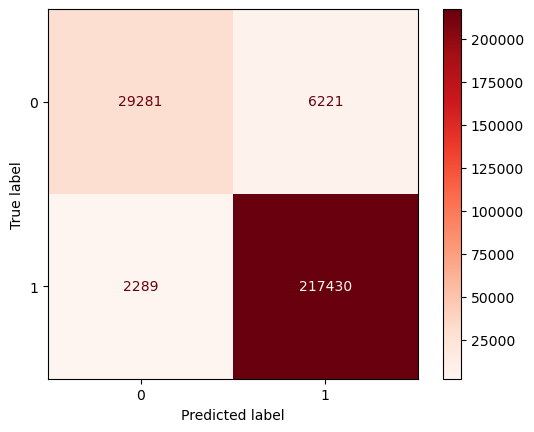

In [124]:
# Plot Confusion Matrix
plot_confusion_matrix(XGB_model, X_test, y_test, cmap='Reds');

Below would be the breakdown for the confusion matrix.
1. **True Positive (TP)**: 217,430
2. **False Positive (FP)**: 6,221
3. **True Negative (TN)**: 29,281
4. **False Negative (FN)**: 2,289

# Next Steps

Further refinements to the data and the model can be taken to help improve the prediction of the model, including adding/removing features to the final dataset used for modeling during pre-processing.  Potential over/under sampling of the data, as there is classification imbalance in the target variable. Altering the target variable is also other option that can be done to help generate better results. Lastly, adjusting more hyperparameters of each model through the ML pipeline can also assist in improving our models even further. 